# DSCI 521: Methods for analysis and interpretation <br> Chapter 7: Approaching regression and classification problems

## 7.0 The big picture
In the context of gradient descent we discussed optimization. There, we utilized the algorithm to determine some parameters (a slope and intercept) for a model that 'fit' the best, i.e., achieve the best possible output in the context of some measure of performance. But let's step back for a moment to discuss the difference betwen classification and regression. 
> In general, for regression models the output variables take the form of continuous values, and in classification the output variables takes class labels.

While there are clear differences between these two modeling contexts, and many different methods for each, routines for their optimzation and evaluation often bear similarities. For example, it is common between the two for a researcher to 

1. identify an objective function 
- split data into training and test sets 
- propose models for evaluation 
- optimize models and select the most desirable

So, since we've already discussed the concept of evaluation and objective functions (we'll review a new on in our discussion of classification), the next topic for us to hit involves splitting data for an experiment.

### 7.0.1 Data splits
Commonly, an optimized model will be _over-fit_ to the particular data on which it is trained. So, to get an idea of how well an algorithm performs on _other_ data from the real world it's customary to have separate datasets&mdash;one for training, and the other for evaluation (testing). We'll get into more complex validation procedures below, and additionally, use them to optimize models. However, at present we're interested in meaningful evaluations out of our trained models. To this end, the first thing we might do is separate some data for training from evaluation (testing). This is referred to as a data _split_. 

#### 7.0.1.1 Separating training from evaluation data
While we've been building up some of our methods from nuts and bolts, much of the modeling work in data science has well established, open-source software in Python that can _at least_ support prototyping. While the contents of this Chpter's discussion focuses on just a few statistical methods, this is a good time to intrtoduce the main machine learning (ML) library for Python, called scikit-learn, i.e., `sklearn`.

`sklearn.model_selection` has a nice way of addressing this topic (much nicer than splitting our data from scratch). But no matter how we split our data up, there's one thing we are positively _required_ to have: a reproducible&mdash;even if randomized&mdash;procedure to replicate our experiment. The utility we're interested in here is `train_test_split(x, y, test_size, random_state)`.

Here, `x`  refers to the predictor, and `y` refers to the target data for prediction. `y` should generally be the 'ground truth', against which an evaluation will take place at the experiment's close. Beyond this, the `test_size` parameter (a number ranging over $(0,1)$) defines how much data gets put into the evaluation set, and the `random_state` parameter make this process reproducible! Let's try this out to start with some baseball player heights, predicting weights:

In [1]:
import pandas as pd

baseball_data = pd.read_csv('./data/2008_merged_baseball_data.csv')

print(baseball_data.keys())

Index(['yearID', 'playerID', 'teamID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SO', 'HBP', 'G_F', 'PO', 'A', 'E', 'nameGiven', 'nameLast',
       'height', 'weight', 'G_P', 'W', 'L', 'SO_P', 'ER', 'HR_P', 'H_P',
       'HBP_P', 'salary', 'name'],
      dtype='object')


In [2]:
from sklearn.model_selection import train_test_split

print(baseball_data.shape)

height_train, height_test, weight_train, weight_test = train_test_split(
    baseball_data[["height"]], baseball_data[["weight"]], 
    test_size=0.33, 
    random_state=42
)

print(height_train.shape, height_test.shape, weight_train.shape, weight_test.shape)

(2072, 31)
(1388, 1) (684, 1) (1388, 1) (684, 1)


## 7.1  Regression
In __Chapter 5__, we talked at length about different mathematical functions as models and worked to determine their parameters. Since we were considering continuous data, that optimization experiment was indeed regression. As is common in this scenario, we strove for the prediction of continuous data values: $y_1, \cdots,y_m$ from some other numeric data: $x_1,\cdots, x_m$. Regardless of the prediction method, it's common to write the _regressed_ estimations of the $y$-values as $\hat{y}_1,\cdots,\hat{y}_n$. 

### 7.1.1 SSE (review)
To get back into regression, let's review our objective functon&mdash;the sum of squared errors ($SSE$):

$$SSE = \sum_{i = 1}^n (\hat{y}_i - y_i)^2$$

$SSE$ is a way to summarize the total prediction quality of a model. As in __Chapter 5__, the general strategy is to build a model that produces predictions&mdash;$\hat{y}_i$ values&mdash;that _minimize_ the $SSE$. $SSE$ is used as an objective function for modeling in many regression contexts, and for simpliciy we'll return to the linear model we studied in the context of gradient descent, too. This model&mdash;linear regression&mdash;is probably among the most commonly studied in these contexts for convenience and some very nice properties.

### 7.1.2 Linear Regression
Here, we're hoping to define a slope, $m$, and $y$-intercept, $b$, to produce prediction values, $\hat{y}_i = mx_i + b$ that minimize $SSE$:

$$
SSE = \sum_{i = 1}^n (\hat{y}_i - y_i)^2 
    = \sum_{i = 1}^n (mx_i + b - y_i)^2
$$

The really exciting thing about linear regression is that there is actually a guarenteed best line, i.e., $(m, b)$ pair, and they can be found with some pretty basic calculus:

1. Set the components of the gradient each equal to zero: $$\begin{align}
SSE'_b &= 2\sum_{i = 1}^n (mx_i + b - y_i) = 0\\
SSE'_m &= 2\sum_{i = 1}^n x_i(mx_i + b - y_i) = 0\\\end{align}$$
2. Solve the two equations for the two variables; the substitution method works, and is easiest solving for $b$ first:$$\begin{align}
0 &= SSE'_b \\
0 &= 2m\sum_{i = 1}^n x_i + 2\sum_{i = 1}^n b - 2\sum_{i = 1}^n y_i\\
0 &= 2mn\overline{x} + 2nb - 2n\overline{y}\\
0 &= m\overline{x} + b - \overline{y}\\
  \Longrightarrow 
b &= \overline{y} - m\overline{x}\end{align}$$
3. Now, substituting into the second equation:$$\begin{align}
0 &= SSE'_m \\
  &= 2\sum_{i = 1}^n x_i(mx_i + b - y_i)\\
  &= \sum_{i = 1}^n mx_i^2 + (\overline{y} - m\overline{x})x_i - x_iy_i\\
  &= \sum_{i = 1}^n mx_i^2 - mx_i\overline{x} + x_i\overline{y} - x_iy_i\\
  &= \sum_{i = 1}^n mx_i(x_i - \overline{x}) + x_i(\overline{y} - y_i)\\
  &= \sum_{i = 1}^n mx_i(x_i - \overline{x}) 
   - m\overline{x}\underbrace{(x_i - \overline{x})}_{0 = \sum (x_i - \overline{x})}
                   + x_i(\overline{y} - y_i) 
   - \overline{x}\underbrace{(\overline{y} - y_i)}_{0 = \sum (\overline{y} - y_i)}\\
  &= \sum_{i = 1}^n m(x_i - \overline{x})^2 + (x_i - \overline{x})(\overline{y} - y_i)\\
  \Longrightarrow
  m &=  \frac{\sum_{i = 1}^n(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i = 1}^n (x_i - \overline{x})^2}\\  
\end{align}$$

So, even though we went to great lengths in __Chapter 5__ to determine these coefficients through the gradient descent algorithm, it turns out one can simply solve for the two:

$$
\hat{m} = \frac{\sum_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2}; \hspace{25pt}
\hat{b} = \overline{y} - \hat{m}\overline{x},
$$

where the 'hats' on our $\hat{m}$ and $\hat{b}$ now indicate they are the 'best', _regressed_ parameters. But remember, most regression contexts don't come with this guarentee! There are some more (higher-order derivative) details on why these $(\hat{m}, \hat{b})$ are the best for linear regression, and the sad part is that this solvability of the linear model is really not something we can expect for all other regression contexts. 

#### 7.1.2.1 Example: Exploring linearity in heights and weights
Let's start with linear regression by reviewing our data to see what we might expect for a relationship. Since we can, let's plot the baseball players' heights and weights again.

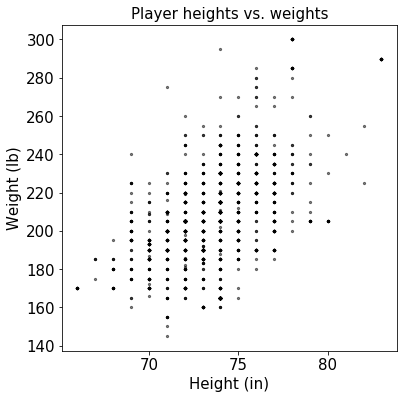

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## set the figure dimensions
scat_fig = plt.figure(figsize = (6,6))
    
## make a scatter plot
_  = plt.scatter(
    baseball_data["height"],baseball_data["weight"],
    color = "black", s = 5, alpha = 0.5
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Player heights vs. weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Weight (lb)", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

#### 7.1.2.2 Executing linear regression
It should be reasonably apparent that these data trend positively together, i.e., as height rises so does weight. But what would be the best line to explain this relationship precisely? For practice, let's use a function and our formula from __Section 7.1.2__ to determine the best parameters:

In [4]:
import numpy as np

def linear_model(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    m = sum((x - x_bar)*(y - y_bar))/sum((x - x_bar)**2)
    b = y_bar - m * x_bar
    return (m, b)

m, b = linear_model(np.array(height_train), np.array(weight_train))
print(m, b)

[5.60288682] [-205.27886031]


#### 7.1.2.3 Depicting our model
Now that we have estimates $\hat{m}$ and $\hat{b}$, we can form the model using vector operations:

- `y_hat = baseball_data["height"]*m + b`

We can then plot these as a line over the data to see the fit.

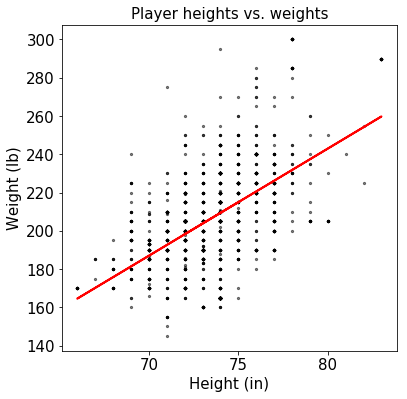

In [5]:
## find the points along the line (predictions)
## from the data x values
y_hat = baseball_data["height"]*m + b

## set the figure dimensions
scat_fig = plt.figure(figsize = (6,6))
    
## make a scatter plot
_  = plt.scatter(
    baseball_data["height"],baseball_data["weight"],
    color = "black", s = 5, alpha = 0.5
)

##
_  = plt.plot(
    baseball_data["height"],
    y_hat,
    color = "red", lw = 2
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Player heights vs. weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Weight (lb)", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

#### 7.1.2.4 Exercise: Understanding error and objectives&mdash;what's the difference between $x$ and $y$?
Non-vertical/horizontal lines are generally invertible, meaning that if you know $y$ from $x$ through the relationship $y = mx + b$, then you know $x$ through the relationship $x = \frac{y}{m} - \frac{b}{m}$, i.e., another line. Considering this, we could switch $x$ and $y$ in our $SSE$ and solve the optimization for $x$:
$$
SSE = \sum_{i = 1}^n (ky_i + c - x_i)^2
$$
But here's the question:

> Would we then find that $c = \frac{b}{m}$ and $k = \frac{1}{m}$?

Investigate this question by applying our linear regression code from __Sec. 7.1.2.2__ with $x$ and $y$ switched, and plotting this new line in blue along with the points and other line __Sec. 7.1.2.3__. Discuss your observations in the markdown cell below and how the changing the role of $x$ and $y$ in $SSE$ impacts the outcome of regression.

_Response._

In [6]:
## code here

#### 7.1.2.5 Using sklearn to perform linear regression
While our implementation of linear regression was pretty straightforward, this was mainly because of the solvability and simplicity of the model. In many cases, models will be significatly more complicated and rely on heavy machinery (often, complex versions of gradient descent) to optimize them. So, evem though we can benefit from forming an intuition by modeling linear regression 'from scratch', what we really need to get into is the primary means by which models like these are implemented. As mentioned, the `sklearn` module will do much of this modeling work for us, so let's explore how it handles the problem&mdash;it is just about as easy as anything else in sklearn, relying only on a single function: 

- `sklearn.linear_model.LinearRegression(x,y)`

Note that since we're using `sklearn`, we benefit from the module's flexibilty on type of input data. In particular, coding the regression by hand we had to be sure to have basic `numpy.array()`s, while in `sklearn` we could pass through the `pandas` series objects, as possessed from data load.

In [7]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(height_train, weight_train)

# Train the model using the training sets
print("Here's the slope: ",lm.coef_)
print("Here's the intercept: ", lm.intercept_)

Here's the slope:  [[5.60288682]]
Here's the intercept:  [-205.27886031]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


#### 7.1.2.6 Evaluating the model
So is this a good fit? That's what $SSE$ is supposed to tell us! To compute, we can once again built the model from $x$ and the regressed parameters, or now with `sklearn`, use the `lm.predict()` method to have them built for us! Regardless, once the predictions are computed we must then add up the squared errors to measure the SSE:

In [8]:
predictions = lm.predict(height_test)

SSE = sum((np.array(weight_test) - predictions)**2)

print(SSE)

[312436.3165535]


#### 7.1.2.7 Evaluating your own model
Compute the predictions that came out of the 'from scratch' implementation (__Sec. 7.1.2.2__) and compute the $SSE$ to exhibit consistency between the two implementations.

In [9]:
## code here

#### 7.1.2.8 Stepping back, what does the 'objective' $SSE$ actually mean?
Perhaps the problem with interpreting our $SSE$ number is that it is 1) in the wrong (squared) units and 2) the total error across all point. To make error more interpretable, folks will often use the _root mean square error (RMSE)_: 
$$RMSE = \sqrt{\frac{SSE}{m}}.$$

This quantity resolves both issues of interpretation and could be utilized in place of the $SSE$ as an objective function to produce the exact same output parameters! However, it's a bit more difficult to analyze, so the $SSE$ is generally utilized for optimization. Now that we've transformed our evaluation score we should be in the same units as the target variable&mdash;pounds. Apparently, we're only off by around 20 pounds, on average!

In [10]:
predictions = lm.predict(height_test)

SSE = sum((np.array(weight_test) - predictions)**2)

RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

[21.37237096]


#### 7.1.2.9 Linear regression with multiple variables
As it turns out, a linear model may have _many_ predictor ($x$) variables. In other terms, we might now have a _matrix_ $x$ ($n$ rows by $k$ columns) of variables, where for each data point ($i$-row), the $j$-indexed columns $x_{i,j}$ are _all_ predictors for the target variable $y$: 

$$
\hat{y}_i = 
\hat{m}_1x_{i, 1} + \hat{m}_2x_{i, 2} + \cdots +\hat{m}_kx_{i, k} + 
\hat{b}
$$

A best set of all $k + 1$ parameters to this type of linear model fortunately still exist. However, implementation now requires an algorithm like gradient descent! Fortunately, we don't have to pull out our code from __Chapter 5__ right here; this has been made _very_ convenient for us by `sklearn`! However, the first thing we'll need to do is organize our data for the experiment. In particular, let's set _the same_ training/test set of weights, but correspond them to the rest of the numeric columns (as a matrix) in our baseball player dataset:

In [11]:
baseball_data = pd.read_csv('./data/2008_merged_baseball_data.csv')

y = baseball_data[['weight']]

x = baseball_data[[u'G', u'AB', u'R', u'H', u'2B', 'salary',
                   u'3B', u'HR', u'RBI', u'SO', u'HBP', u'G_F', u'PO', u'A', u'E',
                   u'height', u'G_P', u'W', u'L',
                   u'SO_P', u'ER', u'HR_P', u'H_P', u'HBP_P']].as_matrix()

print(x.shape)

(2072, 24)


/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Now that our data are lined up we can predict the weights from our matrix using the same procedure&mdash;we just have to `.fit()` and `.predict()` using the data matrix as the first argument, and pass the vector of weights as the second (the target/prediction variable):

In [12]:
# Create linear regression object
lm = LinearRegression()

# create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train the model using the training sets
lm.fit(x_train, y_train)

# predict on a separate testing set
predictions = lm.predict(x_test)

# compute the SSE
SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

[20.84737798]


### 7.1.3 PCA and dimensionality reduction

#### 7.1.3.1 Eigenvectors and Eigenvalues (review)
Now that we've into utilizing multiple variable in our regression experiements, it's a good opportunity to discuss some more of the utility we get out of linear algebra. So, recall: 

+ if $A$ is an $(n \times n)$ matrix and $v$ is an eigenvector of $A$, then for some non-zero scalar (constant), $\lambda$:
     
$$A\cdot v = \lambda v$$

$\lambda$ is called the eigenvector's _eigenvalue_. In other words, matrix-times-eigenvector returns a vector that points in the same exact direction as the original eigenvector. You can keep multiplying the result by $A$ and get back scalings, i.e., growing/shrinking of the same vector.

#### 7.1.3.2 Eigenvectors and eigenvalues intuition (review)
Geometrically, eigenvectors tell you the directions along which your data spread out. This means we can use eigenvectors to tell us about the variation present in a spreadsheet of data, i.e., about how columns and rows of data covary. So, if each point in a data set is a row, represented by two variable columns, we would be able to use eigenvectors to show us something like:

![eigen](images/eigenvectors.png)

#### 7.1.3.3 But eigenvectors only exist for square matrices!
This means there's no such things as eigenvectors and eigenvales for an $m>2$ row by $2$-column matrix. This is why we need to bring together our statistical discussion of variance into matrices, now.

#### 7.1.3.4 The covariance matrix
Recall our formula for the variance of a _vector_ $x = [x_1, x_2, \cdots, x_n]$:

$$
\sigma_{x,x}^2 
= \frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2 
= \frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})(x_i-\overline{x})
$$

It's _covariance_ with another vector, $y = [y_1, y_2, \cdots, y_n]$ is simply

$$
\sigma_{x,y}^2 
= \frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})
$$

This quantity describes how much the two vectors vary together. The covariance matrix of the $n$ columns of an $(m \times n)$ matrix $A$ then records the covariance of every pairwise comparison of columns of $A$. Since $\sigma_{x,y}^2 = \sigma_{y,x}^2$, i.e., a different order records the same covariance, these values are recorded on both sides of this _symmetric_ square matrix. So, writing $\sigma^2_{i,j}$ to indicate the covariance between the $i^\text{th}$ and $j^\text{th}$ columns, the covariance matrix is:

$$
\Sigma_A = 
\begin{bmatrix}
    \sigma^2_{1,1} & \sigma^2_{1,2} & \dots  & \sigma^2_{1,n} \\
    \sigma^2_{2,1} & \sigma^2_{2,2} & \dots  & \sigma^2_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots \\
    \sigma^2_{n,1} & \sigma^2_{n,2} & \dots  & \sigma^2_{n,n}
\end{bmatrix}
$$

Once again and fortunately for us, `numpy`'s got the goods to compute covariance easily. However, this numpy function defaults in a bit of a funny way, treating rows as variables and columns as observations. Thus, we'll have to set `rowvar = False` to get the covariance of our column-variables, which is much more common in spreadsheet-style data.

Note: You should ask youself in the below example: why are all of the covariance values the same?

In [13]:
## define a 4-row by 3-column matrix
A = np.array([
    [ 1,    2,  3],
    [ 4,    5,  6],
    [ 7,    8,  9],
    [ 10,  11, 12]
])

print(A)
print("")

## compute the covariance matrix of the columns
print(np.cov(A, rowvar = False))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[15. 15. 15.]
 [15. 15. 15.]
 [15. 15. 15.]]


#### 7.1.3.5 Principal Component Analysis
Now that we've done all of the hard work thinking about eigenvectors and covariance matrices, it's relatively easy to talk about a  pretty high-level&mdash;but common&mdash;exploratory statistical procedure called _principal component analysis (PCA)_. A principle component analysis simply consists of finding the eigenvectors of a dataset's correlation matrix. It allows for variable-by-variable comparision in context of _all_ columns, as opposed to just pairwise comparisions. Here's a nice intuitive/geometric interpretation from Wikipedia:

>  PCA can be thought of as fitting an n-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component.

Note: principal components refer to the eigenvectors of the covariance matrix. In truth, we've already seen this picture:

![Eigenvectors](./images/eigenvectors.png)

There are quite a few high-level toolkits out there for computing PCA. For example, there are PCA tools in both of `sklearn` and `matplotlib`. However, we can compute PCA easily in two steps with numpy: 

1. find the covariance matrix
2. find the covariance matrix's eigenvectors

In [14]:
## define a 4-row by 3-column matrix
A = np.array([
    [ 1,    2,  3],
    [ 4,    5,  6],
    [ 7,    8,  9],
    [ 10,  11, 12]
])

print(A)
print("")

## compute the covariance matrix of the columns
A_cov = np.cov(A, rowvar = False)

## compute the eigenvectors of the covariance matrix
e_vals, e_vecs = np.linalg.eig(A_cov)

## the eigenvectors are the principal components
print(e_vecs)
print("")

## the eigenvalues tell us how much variance the components explain
print(e_vals)
print("")

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[-0.81649658  0.57735027  0.        ]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.40824829  0.57735027  0.70710678]]

[ 0. 45.  0.]



#### 7.1.3.6 PCA dimensionality reduction
So far, we've only discussed linear algebra and PCA dryly with made-up data. One of the core usages of PCA is _dimensionality reduction_, where we will try to decide if all of our variables are actually telling us something unique. To make this less dry, let's see what happens with the baseball players' heights, weights, and numbers of home runs hit. 

In [15]:
## restrict to numeric columns and drop any NAs
d = baseball_data[["height","weight", "HR"]].dropna()

## standardize the data
d["height"] = (d["height"] - np.mean(d["height"]))/np.std(d["height"])
d["weight"] = (d["weight"] - np.mean(d["weight"]))/np.std(d["weight"])
d["HR"] = d["HR"]/np.std(d["HR"])

## find the covariance matrix
d_cov = np.cov(d, rowvar = False)

print(d_cov)
print("")

## find the eigenvectors and eigenvalues
d_e_vals, d_e_vecs = np.linalg.eig(d_cov)

## the eigenvalues weight the eigenvector/principal components
## by how much variance they explain
print(d_e_vals)
print("")

## here are the eigenvectors/principal components
print(d_e_vecs)
print("")

[[ 1.00048286  0.54664363 -0.02487939]
 [ 0.54664363  1.00048286  0.1482903 ]
 [-0.02487939  0.1482903   1.00048286]]

[0.42736321 1.56104753 1.01303783]

[[ 0.67939766 -0.685854   -0.26081242]
 [-0.70268621 -0.71048902  0.03791369]
 [ 0.21130762 -0.15751081  0.96464472]]



#### 7.1.3.6 Interpreting PCA
How do we interpret this? Presently we have a bunch of abstracted eigenvectors and eigenvalues, but there's some real opportunity for interpretation with PCA. In particular we may:

1. Normalize the eigenvalues (divide by their sum)
    - This lets us see the total variance explained by each eigenvector (column in the final print out, above). 
    - We can then look at the vectors by this "importance" measure.
    - Each vector has directions that correspond to the different variables.
2. Sort the eigenvectors by eigenvalue
    - The two "biggest" vectors explain almost 86% of the variation.
    - If all variables were equally "important", only 66.67% would be explained.
    - So, we might be able to drop a variable without losing much information.
3. Interpret the directions of the eigenvectors and get rid of suppressed variables until an acceptable portion of the  total variance is explained.
    - So, our "best" vector is height-weight balanced, with little 'home run hitting' relevance. 
    - Having a bit more emphasis on weight therefore indicates we can get rid of height and maintain the majority of our variation
    - Now, our  second-best vector is almost all 'home run hitting' and nothing else. So age is largely independent of the other two!

In [16]:
## normalize the eigenvalues into percents to
## to describe the  percent of total variation explained
eig_percents = d_e_vals/sum(d_e_vals)*100

sort_ix,  sort_eig_percents = zip(*sorted(enumerate(eig_percents), reverse = True, key = lambda x: x[1]))

## Let's looks at the percent of total variation explained
## first two account for 86% of the total variation!
## if they were all balanced
print(sort_eig_percents)
print("")

## The most-important vector is balanced across height and weight, 
## with a little more emphasis on weight. This means we can probabily get rid of height!
print(d_e_vecs[:,sort_ix[0]])
print("")

## The second most important vector is almost all about home runs
## but it does exhibit covariation with height!
print(d_e_vecs[:,sort_ix[1]])
print("")

(52.009804323699946, 33.751630404550916, 14.23856527174914)

[-0.685854   -0.71048902 -0.15751081]

[-0.26081242  0.03791369  0.96464472]



#### 7.1.3.7 PCA projection
While discussing PCA it's also important (and very relevant) to touch on the topic of feature extraction. From our PCA algorithm we wind up with a covariance matrix's eigenvector decomposition&mdash;the principal components are a list of eigenvectors:

$$v_1,\cdots, v_n;$$

ordered by the decreasing size of their corresponding _normalized_ eigenvalues:

$$\lambda_1,\cdots, \lambda_n.$$

Again, if normalized these values indicate the portion of variation described by each eigenvector. Above, we read through the eigenvectors to see which variables provided similar information so that we might be able to eliminate some. But now we're going to use a special property of the eigenvectors/principal components:

- The $n$ principal components let you _transform_ your data into more independent features through matrix multiplication.

So, what's that matrix by which you would multiply your data? Supposing the data has $n$ rows (records) by $k$ columns (variables), we can define the principal components matrix: $W = [v_1, \cdots, v_k]$, which has each component as a column vector. With this matrix, the transformed matrix, or engineered features are the matrix product: $T = XW$.

#### 7.1.3.8 PCA projection for feature extraction
We already have all of the nuts and bolts to do PCA feature extraction. However, just like we've done with linear regression we're going to perform PCA as a learning algorithm provided by `sklearn`, using `sklearn.decomposition.PCA()`. Let's work with our baseball players' statistics matrix `x` and weights in `y`, from __Sec. 7.1.2.9__.

If we perform the PCA decomposition with numeric data we'll get a dataset with as many columns as there were numeric columns before. Note: these columns don't have values with specific meanings anymore. So if you're looking for interpretable feature, PCA extraction does not provide this. The key insight is that the new features are more independent. 

To start out, let's give the `sklearn` implementation a try and look at the percentage of variance explained by the first 10 components. How could one feature explain such a high percentage of the variance?

In [17]:
from sklearn.decomposition import PCA

## perform PCA on our data
pca = PCA()
pca.fit(x)

## let's check out how much variance 
## is explained by the first ten components
print("Percentage of variance explained:")
print(100*pca.explained_variance_[0:10]/sum(pca.explained_variance_))

Percentage of variance explained:
[9.99999994e+01 3.78163153e-07 1.13117140e-07 2.70818435e-08
 2.12169121e-08 4.78196551e-09 1.84932530e-09 1.41529784e-09
 1.26224248e-09 7.98933760e-10]


The resulting features we might like to put into our classifer are now accessible to use via: the `.transform()` method. 

In [18]:
print(x.shape)

x_ENG = pca.transform(x)

print(x_ENG.shape)

(2072, 24)
(2072, 24)


#### 7.1.3.9 Exercise: standardizing the columns of a matrix
Utilize the two vectorized matrix methods `.mean()` and `.var()` to standardize the `x` columns (see __Sec. 7.1.3.6__ for an example with standardization) in preparation for dimensionality reduction and fit the result with PCA as in __Sec. 7.1.3.8__. Exhibit the resulting percentage of variance explained by the components are they more reasonable?

In [19]:
## code here

#### 7.1.3.10 Dimensionality reduction
What we've done above is compute $T = X\cdot W$ through the principal components. However, we know most of the variation&mdash;over 90%&mdash;is explained by the first $3$ of $24$ components. Thus, we could perform a _projection_ by using the first $3$ components, only, i.e., instead of $W$, multiply $X$ by the smaller matrix $W_3 = [v_1, v_2, v_3]$. Then, $T_3 = X\cdot W_3$ will still represent almost $95\%$ of the data variation, while only having $3$ instead of $24$ columns. To complete the dimensionality reduction, all we have to do is initialize the PCA with a specified number of components, i.e., `n_components=3`. We'll explore just how this can help out our ML algorithms, below. Here's the code:

In [20]:
## perform PCA on our data
## reduce down to 3 components
pca = PCA(n_components=3)
pca.fit(x)

## print out the original data shape
print(x.shape)

## transform the data
x_ENG = pca.transform(x)

## print out the new, engineered data shape
print(x_ENG.shape)

(2072, 24)
(2072, 3)


### 7.1.3.11 Linear Regression with PCA Projection
Our linear regression utilizes _a lot_ (24) different variables to predict the weights of the players. However, our PCA dimensionality reduction can take the 24-column matrix and create a reduced, 3-column matrix of _engineered features_ that represents almost $95\%$ of the original data set's variation. Let's see how well the dimensionally reduced features do!

In [22]:
# Create linear regression object
lm = LinearRegression()

# create training and test sets
x_train_ENG, x_test_ENG, y_train_ENG, y_test_ENG = train_test_split(x_ENG, y, test_size=0.33, random_state=42)

# Train the model using the training sets
lm.fit(x_train_ENG, y_train_ENG)

# predict on a separate testing set
predictions = lm.predict(x_test_ENG)

# compute the SSE
SSE = sum((np.array(y_test_ENG) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

[24.69814209]


## 7.2 Cross-validation
Now, since we're doing the training/test fit, there's always the unfortunate chance that we're overfit to the specific data in the training set, and/or reality of the test set. To alleviate this issue it's not uncommon to _cross-validate_ an experiment. Here, a train vs. test split is still done, but afterwords the training set is split again into _$k$ folds_, i.e., samples of equal size. After the folds are drawn, each of the $k$ pairings of $1$ _validation_ and $k-1$ _training_ records are used to train and evaluate a model. In other words, if there are $k=5$ folds ${A,B,C,D,E}$, the $k$ validation pairs are:

1. train: $\{A\}$; validate: $\{B,C,D,E\}$
2. train: $\{B\}$; validate: $\{A,C,D,E\}$
3. train: $\{C\}$; validate: $\{A,B,D,E\}$
4. train: $\{D\}$; validate: $\{A,B,C,E\}$
5. train: $\{E\}$; validate: $\{A,B,C,D\}$

For each pair, there are resulting coefficients&mdash;in our example, a slope and intercept, leaving us with two sets: $\{m_1,\cdots, m_5\}$ and $\{b_1,\cdots, b_5\}$. For a pair that are potentially _robust_ to overfitting, we can then take the averages, $\overline{m}$ and $\overline{b}$, and use _these_ in a _final_ evaluation on the test set. Here's a good graphic to visualize the process:

![K Folds](./images/k-folds.png)

As the picture indicates, we can also average things like accuracy, or precision, and recall along the way to get more-solid estimates of performance.

### 7.2.1 Implementing a $k$-fold cross-validation
As usual, there is module for it. This time we'll be using:

- `kf = sklearn.model_selection.KFold(n_splits = k, random_state = n)`

but we'll be sure to use it on the _training_ data. Afterwords, the resulting object can be run with the `.split()` on a target dataset to get indices for training and validation data:

- `train_index, validate_index = kf.split(data)`

In [23]:
from sklearn.model_selection import KFold

## initialize the model
kf = KFold(n_splits=5, random_state = 42)

## make lists to store our coefficients
ms = []
bs = []
## make a list to store our RMSE
RMSEs = []

## loop over the folds
for train_index, validate_index in kf.split(x_train):

    # Train the model using the training sets
    lm.fit(x_train[train_index,], pd.DataFrame(y_train.values[train_index]))
    
    # Train the model using the training sets
    ms.append(lm.coef_[0])
    bs.append(lm.intercept_[0])
    
    # predict on a separate testing set
    predictions = lm.predict(x_train[validate_index,])
    
    # compute the SSE
    SSE = sum((np.transpose(y_train.values[validate_index]) - predictions[:,0])[0]**2)
    
    # compute the RMSE
    RMSEs.append(np.sqrt(SSE/len(predictions)))
    
# let's look at the output from one fold
print(ms[0])
print(bs[0])
print(RMSEs[0])

[ 2.74703160e-02 -2.59612904e-02 -4.35391302e-02  6.26657484e-02
  7.92044248e-02 -7.47308072e-08 -2.71670267e-01  5.43296722e-01
 -7.36332458e-02  7.59477391e-02  3.41327172e-01 -1.60545050e-02
  9.09621978e-03 -7.61457777e-03  4.70709808e-01  5.39330129e+00
  3.48680097e-02  9.89852066e-01 -5.07434261e-01  2.77654384e-02
 -1.34374404e-01  8.79880140e-01 -3.20351477e-02 -1.61402964e-01]
-194.3558997289556
20.399791832197252


### 7.2.2 Build a Final Model
One of the main points of the cross-validation was to control the variation in our model that was due to the pecularities of our training set. Now that we've seen 5 different ways to build this model, we can average them to smooth out the differences. With these averaged coefficients, we can then build our final model and apply it to the test set.

Note: since we did this with many (24) variables, we technically have $24$ $m$s and $1$ $b$ per fold. We can put each list (of lists) of coefficients into a data frame and just use the `.mean()` method:

In [24]:
## here's the intercept
bs_avg = pd.DataFrame(bs).mean()
print(bs_avg)
print("")

## here's the slopes
ms_avg = pd.DataFrame(ms).mean()
print(ms_avg)

0   -200.276911
dtype: float64

0     1.637851e-02
1    -2.196354e-02
2    -2.908700e-02
3     6.158689e-02
4     7.617558e-02
5     1.753282e-08
6    -2.873389e-01
7     6.684239e-01
8    -1.283583e-01
9     7.746344e-02
10    3.528479e-01
11   -2.388121e-02
12    9.818989e-03
13   -2.421846e-03
14    2.910881e-01
15    5.476121e+00
16   -1.667955e-02
17    6.273025e-01
18   -3.985396e-01
19    7.926775e-02
20    1.665966e-02
21    5.811662e-01
22   -7.417358e-02
23   -3.087816e-01
dtype: float64


### 7.2.3 Wait, what does our final model look like?
Well, we did this with many (24) regression variables, which means that we now have $24$ $m$-values, $\hat{m}_1, \cdots, \hat{m}_{24}$, and one slope $\hat{b}$. For a given record, e.j., the $j^\text{th}$ row in our dataset:

$$
[x_{j, 1}, x_{j, 2}, \cdots, x_{j, n}]
$$

our model now looks like:

$$
\hat{y}_j = \hat{m}_1x_{j, 1} + \hat{m}_2x_{j, 2} + \cdots +\hat{m}_nx_{j, n} + \hat{b}
$$

This is just $\hat{b}$ plus the inner product of our $\hat{m}$-values and the data set! Let's do this to build the final model and see how well it does on the testing set.

In [26]:
## compute our model of predictions from the aveaged values
predictions = x_test.dot(ms_avg) + bs_avg[0]

# compute the SSE
SSE = sum((np.array(y_test['weight']) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print(RMSE)

20.851193859519636


## 7.3 Classification
Returning to our discussed distinction betwen classification and regression:
> In general, for regression models the output variables take the form of continuous values, and in classification the output variables takes class labels.

the most simple scenario through which to first approach classification is when there are _exactly two_ possible outcomes, i.e., class labels. This scenario is referred to as _binary classification_, and to study it we'll have to develop an objective function, i.e., a means for measuring performance. Here, we no longer have continuous variables as output, so there's no such thing as an $SSE$. This means that the output of any algorithm will simply be correct, or not, and the best place to start will be with simply counting up the 'hits' and 'misses' our algorithm makes.

### 7.3.1 Class Imbalances: Accuracy isn't all it's cracked up to be
Even in this simplest classification scenario (binary), 'accuracy' is a fraught measure of success. This is because we are often interested in finding &quot;positives&quot; that are few in number. 

For example, in the medical domain a deadly disease might be rare, with a prevalence of $1\%$ in the general population. One could easily build a &quout;classifier&quot; that simply guesses no one has the disease. This classifier would have an accuracy $99\%$, but that's no good! _No one_ would get diagnosed who _actually_ had the disease. This misrepresentation of classifier performance is symptomatic of a problem called a _class imbalance_, in which the classes appear in the larger population at _very_ different rates. 

A good preliminary view into to this discussion is provided by the following cartoon, which highlights the different ways you can be right vs. wrong in binary classification:

![Binary Classification](./images/precisionrecall.jpg)

### 7.3.2 Evaluating binary classification: the confusion matrix
So, what are better measures of performance in this scenario? Let's talk about the _confusion matrix_, which is an unfortuantely terminology for an enumeration of the possible outcomes for an individual record being processed by a calssification algorithm. For this conversation, there are two big things to keep straight: class _label_ vs. _prediction_. Accuracy just measures the overall accord between truth an prediction, however, both a label and its prediciton can each take two flavors in binary classification, _positive_ and _negative_. Thus, we enumerate the four possible outcomes:

- True Positive (__TP__): a label and prediction are both positive
- True Negative (__TN__): a label and preduction are both negative
- False Positive (__FP__): a label is negative, but its prediction is positive
- False Negative (__FN__): a label is positive, but its prediction is negative

The last two scenarios encode all of a model's errors. These outcomes are often recorded in a tabular fashion, referred to as the confusion matrix:

![Confusion Matrix](./images/confusion.png)

#### 7.3.2.1 Understanding class imbalances
In the case of our class imbalance, we had very high TNs and no FPs, but _no_ TPs and very relatively few FNs. So how can we use this broken-down evaluation information to understand a model's performance in the face of a class imbalance (which is common)? To start this conversation, let's just put up model _accuracy_ in terms of the confusion matrix quantities:

$$acc = \frac{TP + TN}{TP +TN +FP + FN}$$

Now, in the case of our class imbalance there might be _very_ few positively-labeled pieces of data, i.e., $TN + FP \gg TP + FN$. In this case it can pay off _big_ in terms of accuracy to keep $FP,TP = 0$, optimizing for accuracy with:

$$acc = \frac{TN}{TN + FN},$$

So, if _positives_ are rare and _actually_ what we're interested in predicting, they we might instead interest ourselves specifically in _positive prediction_ assessment (below).

#### 7.3.2.2 Example: binary prediction data
Pulling from a dataset on the mortality of Titanic (the ship) passengers provided by Stanford CS:

- http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

Let's investigate the data!

In [27]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### 7.3.2.3 Exercise: reviewing the balance of classs
Investigate the Titanic data just a bit more and determine the numbers of positives (survivals) and negatives (fatalities). Discuss the severity of these data's class imbalance below.

_Response._

In [28]:
## code here

#### 7.3.2.4 Example: setting a baseline
First things first, to talk about performance we'll need some predictions. Let's just use a baseline, "women and children first" and predict that only these individuals survive:

In [29]:
baseline = ((titanic['Sex'] == 'female') | (titanic['Age'] < 18)).astype(int)
baseline.head()

0    0
1    1
2    1
3    1
4    0
dtype: int64

Now, to compute the accuracy we'll need to know each of the various confusion statistics. Let's do that!

In [30]:
TP = ((baseline == 1) & (titanic['Survived'] == 1)).astype(int).sum()
FP = ((baseline == 1) & (titanic['Survived'] == 0)).astype(int).sum()
TN = ((baseline == 0) & (titanic['Survived'] == 0)).astype(int).sum()
FN = ((baseline == 0) & (titanic['Survived'] == 1)).astype(int).sum()
print(TP, FP, TN, FN)

258 123 422 84


Now that we have the confusion statistics, let's see how accurate our baseline was!

In [31]:
print((TP + TN)/(TP + FP + TN + FN))

0.7666290868094702


### 7.3.3 Positive Prediction Assessment: Precision, Recall, &  F1
_Precision_ and _recall_ help evaluate models amidst class-imbalanced data. But wait, what are precision and recall?? 

Probabilistically:

- Precision: 
$$P(\text{a prediction is correct}\mid\text{the prediction was positive}) = \frac{TP}{TP+FP}$$

- Recall: 
$$P(\text{a prediction is correct}\mid\text{a label is positive}) = \frac{TP}{TP+FN}$$

Essentially, precision tells you how _precise_ your classifier's positive predictions were. This is why is is also referred to as the _positive predicive value_. It tell's you about the chance that any positive guess is correct.

On the other hand, recall tells you about you model's ability to _recover_ positive labels. This is why recall is also referred to as the model _sensitivity_, or _recovery rate_.

We can see the broader picture of what's going on here in the whole cartoon from above:

![Precison and Recall](./images/PrecisionRecall.png)

#### 7.3.3.1 Working with two evaluation measures
When we move away from accuracy, we suddenly have multiple measures (precision and recall). This is a bit of a challenge, since people and machines both have an easier time judging if something's good by a single number. Just think about the stock market; people commonly track the Dow Jones, instead many individual stocks to assess overall market health. Well, that's exactly what's usually done with binary classifier assess. How? With averages! Specifically, since both precision and recall are _rates_, the accepted way to average the two for an overall model evaluation is called the [$F_1$ score](https://en.wikipedia.org/wiki/F1_score), which is the _harmonic mean_ of precision and recall:

$$F_1 = \frac{2}{\frac{1}{P} + \frac{1}{R}} = \frac{2PR}{P+R}$$

While an $F_1$ score is no longer a probability,  it is bounded by $0$ and $1$ and can be thought of as a mixed measure of _sensitivity_ and _positive predictive_ performance.

#### 7.3.3.2 Computing precision,  recall, and $F_1$ with sklearn
This is once again a scenario where life is made easy for us by modules. Using the functions:

- `sklearn.metrics.precision_score(predictions, labels)`
- `sklearn.metrics.recall_score(predictions, labels)`
- `sklearn.metrics.f1_score(predictions, labels)`

we can move right along. So, were are classes heavily imbalanced?

In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score

## look at our accuracy
print("Here's the accuracy: ")
print((TP + TN)/(TP + FP + TN + FN))
print("")

## compare accuract to the model's precision, recall, and F1
print("Here's precision, recall, and F1")
print(precision_score(baseline, titanic["Survived"]))
print(recall_score(baseline, titanic["Survived"]))
print(f1_score(baseline, titanic["Survived"]))

Here's the accuracy: 
0.7666290868094702

Here's precision, recall, and F1
0.7543859649122807
0.6771653543307087
0.7136929460580913


### 7.3.4 Logistic Regression
Why is this 'regression' in our classification section? Well, one way to view logistic regression is as a means to obtain a probabilistic output variable from numeric input. For binary classification, it turns out we can train a logistic regression model and accept high-probability outputs as predictions of 'truth', accepting the prediction of a positive class upon receiving a high probability as output and leave all other data points as labeled 'negative'.

So, logistic regression is actually often used as a _classification_ algorithm, to be used in circumstances where the target variable is binary. So, going back to the Titanic dataset, we can approach the prediction of the `'Survived'` column as a binary output. However, as we'll see in a moment all input variables must be numeric, so let's do a bit of feature engineering. 

#### 7.3.4.1 Feature engineering for logistic regression
Presently, the Titanic dataset has the binary `'male'`/`'female'` column. We can convert this to a numeric `0`/`1` variable, mapping `'male'` to `0` and `'female'` to `1` . After this, we can drop the name column for our predictors data and be sure to separate the `'Survived'` column as the $y$ value for prediction:

In [33]:
titanic['Sex'][titanic['Sex'] == 'male'] = 0
titanic['Sex'][titanic['Sex'] == 'female'] = 1

y = titanic['Survived']
x = titanic[['Pclass', "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]]

print(y.head())
print(x.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0       3   0  22.0                        1                        0   7.2500
1       1   1  38.0                        1                        0  71.2833
2       3   1  26.0                        0                        0   7.9250
3       1   1  35.0                        1                        0  53.1000
4       3   0  35.0                        0                        0   8.0500


/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 7.3.4.2 Defining logistic regression 
So setting up, each record looks like a numneric vector, $x$, from which we want to estimate a probability that the corresponding $y$ value is a $0$ or $1$ label.  The first most important thing we need here is the (standard) _logistic function_ (__also discussed in Ch. 5.0.3.3__), $q(t)$: 

$$q(t) = \frac{1}{1+e^{-t}}$$

Recall: the logistic function looks like an "S":

![Logistic Function](./images/Logistic-curve.png)

For any number, $t$, $q(t)$ returns a non-negative number in $[0,1]$ that can interpreted as a probability. So, _generalizing linear regression for probabilistic output_, we'll look for parameters, $\vec{m} = [m_1,\cdots, m_n]$ and $b$ to transform our data into logistic-function input: 
$$t_i = \vec{m}\cdot \vec{x_i} + b$$
to define the class probability model, $q(t_i)$. Here, a higher probability is considered a higher chance of positive prediction:

$$
P(x_i\:\text{ has class }\:y_i = 1) = 
\frac{1}{1+e^{-(\hat{m}\cdot \hat{x_i} + b})}
$$

So, viewing the output as a 'probability', we can apply a threshold for classification. The "best" parameters $\hat{\vec{m}}$ and $\hat{b}$, define $\hat{t}_i = \hat{\vec{m}}\cdot \vec{x}_i + \hat{b}$ to maximize independent joint logistic function probabilities:

$$
\prod_{i = 1}^m
q(\hat{t}_i)^y_i
\left(1 - q(\hat{t}_i)\right)^{1-y_i}
$$


Optimization of $\hat{\vec{m}}$ and $\hat{b}$ is done like with linear regression (likely some variation on gradient descent), but now towards _maximizing_ likelihood (above), instead of _minimizing_ $SSE$ as an objective. Generally, a threshold is applied to test-set probabilities for final classifications.

#### 7.3.4.3 Implementing logistic regression
Now, just like with regression we'll want to have training and test data separated first:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(709, 6) (178, 6)


But since we've modified our data, let's compute a baseline on our _test_ set for later comparison:

In [35]:
baseline = ((x_test['Sex'] == 1) | (x_test['Age'] < 18)).astype(int)
baseline.head()

TP = ((baseline == 1) & (y_test == 1)).astype(int).sum()
FP = ((baseline == 1) & (y_test == 0)).astype(int).sum()
TN = ((baseline == 0) & (y_test == 0)).astype(int).sum()
FN = ((baseline == 0) & (y_test == 1)).astype(int).sum()
print(TP, FP, TN, FN)

## compare accuract to the model's precision, recall, and F1
print("Here's precision, recall, and F1")
print(precision_score(baseline, y_test))
print(recall_score(baseline, y_test))
print(f1_score(baseline, y_test))

45 23 88 22
Here's precision, recall, and F1
0.6716417910447762
0.6617647058823529
0.6666666666666667


Now that we've got our baseline in place, let's if `sklearn`'s implementation:
- `sklearn.linear_model.LogisticRegression(solver = 'lbfgs')`

can do any better with our split up training data. Note that initializing the classifier with the argument: `solver = 'lbfgs'` is telling `sklearn` _which_ optimizer, e.g., gradient descent, we'd like it to use. `'lbfgs'` refers to one (likely complicated) such algorithm. To see what else is available and try out them out, review the docs!

Note: after running `.fit()` on the classifier object, it is then possible to retrieve the model's (built in) predictions by the `.predict()` method, but more deeply understand the model's output probabilities through the `.predict_proba()` method.

In [36]:
from sklearn.linear_model import LogisticRegression

Logistic_classifier = LogisticRegression(solver='lbfgs')

Logistic_classifier.fit(x_train, y_train)

predictions = Logistic_classifier.predict(x_test)

print(Logistic_classifier.predict(x_test)[:6])
print(Logistic_classifier.predict_proba(x_test)[:6])

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

[0 0 0 0 0 1]
[[0.65327307 0.34672693]
 [0.82110738 0.17889262]
 [0.9760575  0.0239425 ]
 [0.72339466 0.27660534]
 [0.89775756 0.10224244]
 [0.32754277 0.67245723]]
Precision, recall, and F1 were:
0.5522388059701493
0.7254901960784313
0.6271186440677965



#### 7.3.4.4 Exercise: understanding prediction probabilities
To `.predict()`, the `sklearn` module _must_ have some criteria for interpreting the output of `.predict_proba()` to the optimal predictions. To explore, set $11$ threshold values: `thresholds = [i/10 for i in range(0,10)]`, and, using the output of the `.predict_proba()` method determine your own set of predictions and performance statistics for each. When finished, indicate which (if any) of the thresholds is likely most similar to that used by `sklearn`.

_Response._

In [37]:
thresholds = [i/10 for i in range(11)]
## code here

#### 7.3.4.5 Bringing other feature engineering into the 'pipline'
Since our model once again (like with linear regression) relies on a matrix of numeric data, we can try out our other tricks. This doesn't necessarily mean they'll help, but part of the game with modeling is exploring the effects of the application and combination of various algorithms. So, let's do some PCA on our Titanic data for dimensionality reduction and see if this helps:

In [38]:
from sklearn.decomposition import PCA

## perform PCA on our data
## reduce down to 3 components
pca = PCA(n_components=6)
pca.fit((x - x.mean(axis=0))/x.var(axis = 0))

## print out the original data shape
print(x.shape)

## transform the data
x_ENG = pca.transform(x)

## print out the new, engineered data shape
print(x_ENG.shape)

(887, 6)
(887, 6)


Now that we've modified our data, we have to do our training/test split again:

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_ENG, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(709, 6) (178, 6)


Finally, now that we have the modified pieces we can apply the classifier and evaluate.

In [40]:
from sklearn.linear_model import LogisticRegression

Logistic_classifier = LogisticRegression(solver='lbfgs')

Logistic_classifier.fit(x_train, y_train)

predictions = Logistic_classifier.predict(x_test)

print(Logistic_classifier.predict(x_test)[:6])
print(Logistic_classifier.predict_proba(x_test)[:6])

print("Precision, recall, and F1 were:")
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(f1_score(predictions, y_test))  
print("")

[0 0 0 0 0 1]
[[0.65327307 0.34672693]
 [0.82110738 0.17889262]
 [0.9760575  0.0239425 ]
 [0.72339466 0.27660534]
 [0.89775756 0.10224244]
 [0.32754277 0.67245723]]
Precision, recall, and F1 were:
0.5522388059701493
0.7254901960784313
0.6271186440677965



#### 7.3.4.6 Exercise: exploring dataset variation through model performance and evaluation
Even through our particular combination of algorithms _with_ PCA projection didn't appear to result in any model improvement, the execution of the model on fewer feature columns may have provided a critical boost to speed. This is a nice aspect of PCA, but there may in fact be other reasons to consider its maintenance in our final combine algorithm.

Throughout this chapter we've discussed the importance of repeatability and randomness, but the particular randomization we've created might actually be the reason why we see no improvement with, e.g., projection. Specifically, the data we've split might just happen to have organized the test set (a smaller portion) to be easily predicted from the variation in the training set. In other words, we might accidentally be overfitting still. To explore, let's modify the random seed to a few different values and see how widely the performance changes, for both the original, and PCA-projected models.

In [41]:
## code here

#### 7.3.4.7 Bringing cross-validation into the picture
Now that we've explored the effects of model training on different data splits, let's see if some of this effect is additionally controlled by cross-validation. In paricular, utilize the cross-validation routine executed in __Sections 7.2.1&ndash;7.2.3__ but now in the context of our binary classification problem.

In [42]:
## code here